In [6]:
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU, Dropout

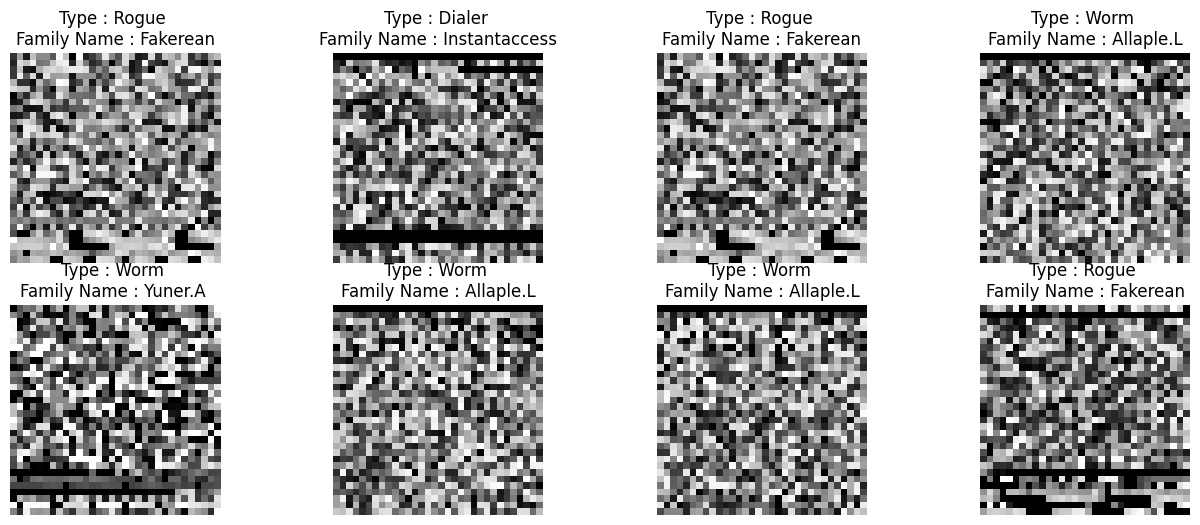

In [4]:
data = np.load('images_malware.npz', allow_pickle=True)
image_data = data['arr']
fig, axes = plt.subplots(2, 4, figsize=(16, 6), label = "Malware Images")

axes = axes.flatten()

# families as they are described in the article
family_dict = {1 :["Dialer", "Adialer.C", 122],
2 :["Backdoor", "Agent.FYI", 116],
3 :["Worm", "Allaple.A", 2949],
4: ["Worm", "Allaple.L", 1591],
5 :["Trojan", "Alueron.gen!J", 198],
6 :["Worm:AutoIT", "Autorun.K", 106],
7 :["Trojan", "C2Lop.P", 146],
8 :["Trojan", "C2Lop.gen!G", 200],
9 :["Dialer", "Dialplatform.B", 177],
10 :["Trojan Downloader", "Dontovo.A", 162],
11 :["Rogue", "Fakerean", 381],
12 :["Dialer", "Instantaccess", 431],
13 :["PWS", "Lolyda.AA", 1213],
14 :["PWS", "Lolyda.AA", 2184],
15 :["PWS", "Lolyda.AA", 3123],
16 :["PWS", "Lolyda.AT", 159],
17 :["Trojan", "Malex.gen!J", 136],
18 :["Trojan Downloader", "Obfuscator.AD", 142],
19 :["Backdoor", "Rbot!gen", 158],
20 :["Trojan", "Skintrim.N", 80],
21 :["Trojan Downloader", "Swizzor.gen!E", 128],
22 :["Trojan Downloader", "Swizzor.gen!I", 132],
23 :["Worm", "VB.AT", 408],
24 :["Trojan Downloader", "Wintrim.BX", 97],
25 :["Worm", "Yuner.A ",800]}

random_indices = random.sample(range(image_data.shape[0]), 8)

for i, index in enumerate(random_indices):
    img1, family = image_data[index]
    axes[i].imshow(img1, cmap='gray')
    axes[i].set_title(f"Type : {family_dict[family+1][0]} \nFamily Name : {family_dict[family+1][1]}")
    axes[i].axis('off') 
plt.show()

In [5]:
# We get the pictures of the dataset as an array of matrix of shape 32x32
X_list = image_data[:,0]
X = np.zeros((X_list.shape[0],32,32))
y = image_data[:,1]

for i,x in enumerate(X_list):
  #X[i,:]=x.flatten()
  X[i,:]=x

In [28]:
# We split our dataset into a training set and a testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [29]:

#We make the neural network architecture based on the model described in the article
model = Sequential()

model.add(Conv2D(36, (5, 5), strides=(1, 1), padding='same', input_shape=(32,32, 1)))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(72, (5, 5), strides=(1, 1), padding='same'))
model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(Flatten())
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.85))
model.add(Dense(25, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 36)        936       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 36)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 72)        64872     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 72)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 72)        0         
 g2D)                                                 

In [30]:
#We must preprocess our data, the target must be a one hot array
y_train_one_hot = to_categorical(y_train, num_classes=25)
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [31]:
#Then we can do the training of the neural network
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history =model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
141/141 [==============================] - 289s 2s/step - loss: 58.4687 - accuracy: 0.2494 - val_loss: 3.5394 - val_accuracy: 0.4282
Epoch 2/10
141/141 [==============================] - 287s 2s/step - loss: 4.8792 - accuracy: 0.3092 - val_loss: 1.6166 - val_accuracy: 0.5763
Epoch 3/10
141/141 [==============================] - 289s 2s/step - loss: 3.1339 - accuracy: 0.3987 - val_loss: 1.3914 - val_accuracy: 0.6173
Epoch 4/10
141/141 [==============================] - 289s 2s/step - loss: 2.1427 - accuracy: 0.4987 - val_loss: 1.2030 - val_accuracy: 0.6530
Epoch 5/10
141/141 [==============================] - 290s 2s/step - loss: 1.7378 - accuracy: 0.5622 - val_loss: 0.9028 - val_accuracy: 0.6958
Epoch 6/10
141/141 [==============================] - 286s 2s/step - loss: 1.3478 - accuracy: 0.6287 - val_loss: 0.7724 - val_accuracy: 0.7511
Epoch 7/10
141/141 [==============================] - 290s 2s/step - loss: 1.4214 - accuracy: 0.6330 - val_loss: 0.8374 - val_accuracy: 0.719

Accuracy : 73.68%

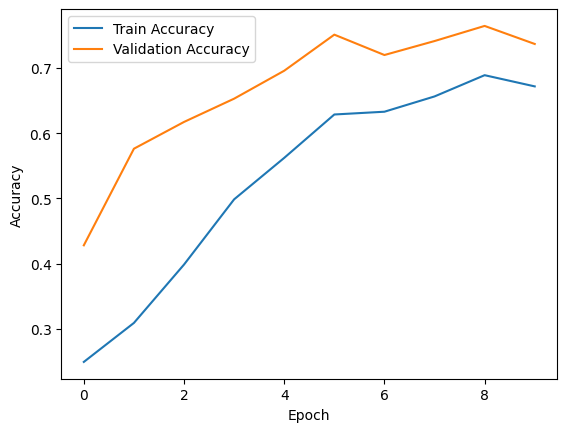

In [33]:
#We plot the accuracy of the model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As we can see, it is the same accuracy as the one in the artcile

In [43]:
y_pred = model.predict(X_test)
y_end = np.argmax(y_pred, axis=1)+1
y_test =y_test.reshape(y_test.shape[0])
y_test = np.array(y_test).astype(int)
y_end = np.array(y_end)

117/117 [==============================] - 39s 335ms/step


array([2, 2, 2, ..., 3, 3, 8])

In [36]:
#We plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_end)

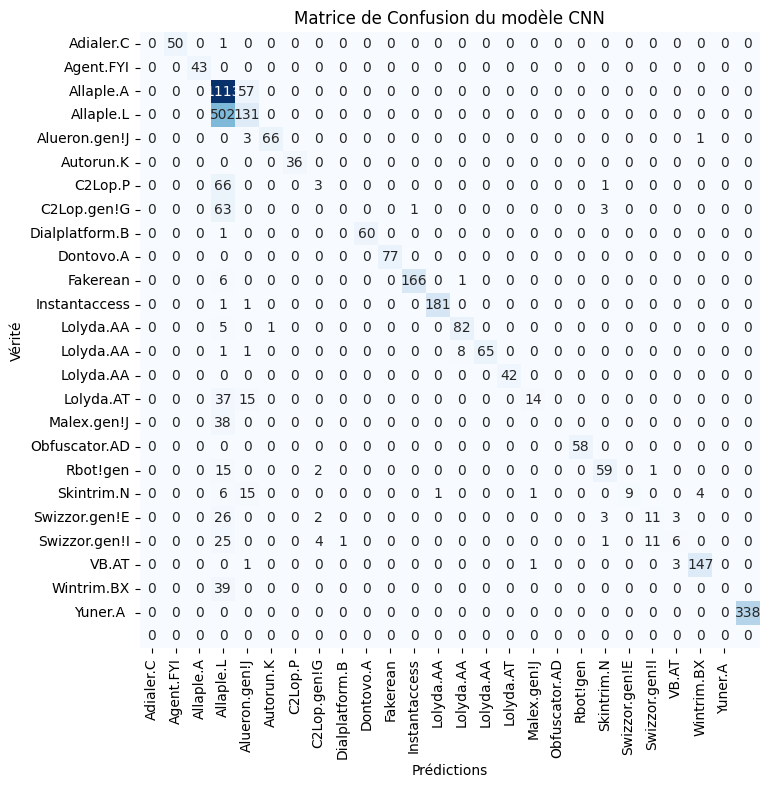

In [42]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_end)

fig, ax = plt.subplots(figsize=(8, 8))  # Ajustez la taille selon vos besoins
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[family_dict[i][1] for i in range(1, 26)],
            yticklabels=[family_dict[i][1] for i in range(1, 26)])
plt.xlabel('Prédictions')
plt.ylabel('Vérité')
plt.title('Matrice de Confusion du modèle CNN')
plt.show()